# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [5]:
ab = pd.read_csv('ab_data.csv')
ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [6]:
ab.shape[0]

294478

**c.** The number of unique users in the dataset.

In [7]:
users = ab.user_id.unique()
print(len(users))

290584


**d.** The proportion of users converted.

In [8]:
converted = ab[ab.converted == 1].shape[0]
user_count = len(users)
conversion_rate = converted/user_count
print(conversion_rate)

0.12126269856564711


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [9]:
treatment = ab[ab.group == 'treatment']
not_new = treatment[treatment.landing_page != 'new_page']
print(not_new.shape[0])

1965


**f.** Do any of the rows have missing values?

In [10]:
ab.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
ab['valid'] = False
for index, row in ab.iterrows():
    if (row['group'] == 'control' and row['landing_page'] == 'new_page') or (row['group'] == 'treatment' and row['landing_page'] == 'old_page'):
        ab.at[index, 'valid'] = True
    else:
        ab.at[index, 'valid'] = False

In [12]:
ab[ab.valid == True].shape[0]
ab.head()

,user_id,timestamp,group,landing_page,converted,valid
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False


In [13]:
df2 = ab[ab['valid'] == False]

In [14]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [15]:
len(df2.user_id.unique())

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted,valid
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,False


**c.** Display the rows for the duplicate **user_id**? 

In [17]:
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted,valid
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,False


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [18]:
# Remove one of the rows with a duplicate user_id.. 
df2 = df2.drop_duplicates(subset='user_id', keep=False)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted,valid


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>



In [19]:
total_users = len(df2.user_id.unique())
converted = len(df2[df2['converted'] == True])

In [20]:
population = converted/total_users
print(population)

0.11959749882133504


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
control_users = len(df2[df2['group'] == 'control'])
control_converted = len(df2[((df2['group'] == 'control') & (df2['converted'] == True))])
control_percentage = control_converted/control_users
print(control_percentage)

0.1203863045004612


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
treatment_users = len(df2[df2['group'] == 'treatment'])
treatment_converted = len(df2[((df2['group'] == 'treatment') & (df2['converted'] == True))])
treatment_percentage = treatment_converted/treatment_users
print(treatment_percentage)

0.11880888313869065


In [23]:
rate_diff = control_percentage - treatment_percentage

**d.** What is the probability that an individual received the new page?

In [24]:
new_page = len(df2[df2['landing_page'] == 'new_page'])
page_percentage = new_page/total_users
print(page_percentage)

0.5000602237570677


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

The new treatment group users did not seem to lead to more conversions as the difference between the two is not statistically signifcant.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

**$H_0$**: There is no statistically significant difference in the conversion rate between **$p_{old}$** and **$p_{new}$** in comparison with the conversion rate of $p_{population}$.  Also written as **$p_{new}$** <= **$p_{old}$**

**$H_1$**: There is a statistically significant improvement in conversion rate from **$p_{old}$** to **$p_{new}$**.  Also written as **$p_{new}$** > **$p_{old}$**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [25]:
conversion_rate_new = 0.1196

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [26]:
conversion_rate_old = 0.1196

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [27]:
print(treatment_users)

145309


**d.** What is $n_{old}$, the number of individuals in the control group?

In [28]:
print(control_users)

145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [29]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0, 1], size=treatment_users, p=[1 - conversion_rate_new, conversion_rate_new])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [30]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], size=control_users, p=[1 - conversion_rate_old, conversion_rate_old])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [31]:
simulated_conversion_rate_new = np.mean(new_page_converted)
simulated_conversion_rate_old = np.mean(old_page_converted)
rate_diff = simulated_conversion_rate_new - simulated_conversion_rate_old
print(rate_diff)

0.00106523785628



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [32]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0, 1], size=treatment_users, p=[1 - conversion_rate_new, conversion_rate_new])
    old_page_converted = np.random.choice([0, 1], size=control_users, p=[1 - conversion_rate_old, conversion_rate_old])
    simulated_conversion_rate_new = np.mean(new_page_converted)
    simulated_conversion_rate_old = np.mean(old_page_converted)
    rate_diff = simulated_conversion_rate_new - simulated_conversion_rate_old
    p_diffs.append(rate_diff)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

*The plot does look how I expected when doing the original analysis.  The largest peak of data, meaning the most frequent occurrences, matches with the difference observed previously.  There are large drops in frequency as the data moves multiple standard deviations away from that original datapoint.*

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

Text(0,0.5,'Frequency of Occurrence')

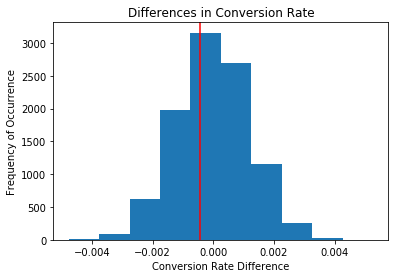

In [33]:
plt.hist(p_diffs)
plt.axvline(rate_diff, color='red')
plt.title('Differences in Conversion Rate')
plt.xlabel('Conversion Rate Difference')
plt.ylabel('Frequency of Occurrence')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [36]:
obs_diff = df2.query('group == "treatment"')['converted'].mean()-df2.query('group == "control"')['converted'].mean()
(p_diffs > obs_diff).mean()

0.90380000000000005

In [37]:
np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

(-0.0023483359913321271, 0.0023389254475542913)

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

**I calculated a new sampling distribution using a bootstrapping method.  Then I calculated the p-value in section j which is greater than 5%. This means we would fail to reject the null hypothesis.  I calculated a confidence interval that states I am 95% confident that the actual difference of the population lies somewhere between -0.24% and 0.23%.**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [38]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[(df2['converted'] == True) & (df2['landing_page'] == 'old_page')].shape[0]

# number of conversions with the new_page
convert_new = df2[(df2['converted'] == True) & (df2['landing_page'] == 'new_page')].shape[0]

# number of individuals who were shown the old_page
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]

# number of individuals who received new_page
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [39]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new, convert_old]), np.array([n_new, n_old]), value=0, alternative='larger')
print(z_score, p_value)

-1.31024085793 0.904942816116


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

**For a one-tailed test, which is performed here, it is determined, with a 95% confidence interval, that the the difference in conversion rates between new and old pages will fall between -1.645 and 1.645.  Since the z-score calculated is -1.31 we can conclude that the results are not statistically siginificant in a way that we can reject the null hypothesis.  In addition, the p-value is 0.90 which is higher than our accepted threshold of 0.05.  Therefore, we fail to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression should be used as it predicts only two possible outcomes.  In this case that would be either conversion or no conversion.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [96]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,valid,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [105]:
logit_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [108]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-12-30 00:23 AIC:              212780.0972
No. Observations:   290583           BIC:              212801.2565
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3102  0.1901  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


**The p-value asssociated with ab_page is .1901 which is higher than our threshold of of 0.05.  Due to this we can determine that we've failed to reject the null hypothesis.  The p-value is much different than the previous calculation where the p-value was 0.90.  The reason for that is that this a regression model using a one-tailed A/B test.  It's only testing the one side of the distribution so the number won't be tested the same way our previous test would.  However, the evaluation is the same as the p-value is still significantly higher than 0.05 so we can fail to reject the null hypothesis**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It's important to consider other items in a regression model as there are multiple factors that influence a result.  The page visited is not the only reason that the person visiting the page would be converted or not.  As we add multiple other factors we can see if there's stronger reasons someone might make a certain decision than just the landing page.  Disadvantages to adding other factors is we can add data that can skew our results if we don't consider how the variables correlate with one another.  In this situation since the only other variable we're testing is the landing page and whether they converted or not, there is most likely not a conflicting relationship with correlation if we add another factor but it's still important to consider and limit how much is added to the model.  It's important that data added is relevant to the test we're conducting.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [112]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [124]:
df_merged = df2.merge(countries, on=None, how='left', sort=False)
df_merged.head()

290583

In [157]:
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged.country)
df_merged.drop('CA',axis=1, inplace=True)

In [159]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,valid,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,US,0,1


In [160]:
logit_m = sm.OLS(df_merged['converted'], df_merged[['intercept', 'UK', 'US']])
results_c = logit_m.fit()
results_c.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.000      
Dependent Variable: converted        AIC:                170539.4512
Date:               2022-12-30 02:17 BIC:                170571.1901
No. Observations:   290583           Log-Likelihood:     -85267.    
Df Model:           2                F-statistic:        1.605      
Df Residuals:       290580           Prob (F-statistic): 0.201      
R-squared:          0.000            Scale:              0.10529    
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
intercept      0.1153     0.0027   42.7923   0.0000    0.1100   0.1206
UK             0.0053     0.0030    1.7872   0.0739   -0.0005   0.0111
US             0.0042     0.0028    1.5163   0.1295   -0.0012   0.0097
--------------------------------------------------------------------
Omnibus:             125551.502     Durbin-Watson:        1.995     
Prob(Omnibus):       0.000          Jarque-Bera (JB):     414300.851
Skew:                2.345          Prob(JB):             0.000     
Kurtosis:            6.497          Condition No.:        10        
====================================================================

"""

**It does not appear that the country had an impact on the conversion rate.  By analyzing the coefficients it appears that the UK was slightly less efficient than CA and the US was slightly more efficient than CA.  However, with p-values of .1295 and .4557 respectively and both being larger than 0.05, we cannot reject the null hypothesis.  This means that countries do not appear to have a statistically significant impact on conversion rate**

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [161]:
df_merged['UK_ab_page'] = df_merged['UK'] * df_merged['ab_page']
df_merged['US_ab_page'] = df_merged['US'] * df_merged['ab_page']

In [162]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,valid,intercept,ab_page,country,UK,US,UK_ab_page,US_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,US,0,1,0,0


In [172]:
logit_m2 = sm.OLS(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US', 'UK_ab_page', 'US_ab_page']])
results_c2 = logit_m2.fit()
results_c2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.000      
Dependent Variable: converted        AIC:                170541.3320
Date:               2022-12-30 02:29 BIC:                170604.8098
No. Observations:   290583           Log-Likelihood:     -85265.    
Df Model:           5                F-statistic:        1.466      
Df Residuals:       290577           Prob (F-statistic): 0.197      
R-squared:          0.000            Scale:              0.10529    
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
intercept      0.1188     0.0038   31.0570   0.0000    0.1113   0.1263
ab_page       -0.0069     0.0054   -1.2766   0.2018   -0.0174   0.0037
UK             0.0012     0.0042    0.2960   0.7672   -0.0070   0.0094
US             0.0018     0.0040    0.4667   0.6407   -0.0059   0.0096
UK_ab_page     0.0080     0.0059    1.3599   0.1739   -0.0035   0.0196
US_ab_page     0.0047     0.0056    0.8456   0.3978   -0.0062   0.0157
--------------------------------------------------------------------
Omnibus:             125548.556     Durbin-Watson:        1.995     
Prob(Omnibus):       0.000          Jarque-Bera (JB):     414280.772
Skew:                2.345          Prob(JB):             0.000     
Kurtosis:            6.497          Condition No.:        26        
====================================================================

"""

**Concluding the analysis, the p-value results for the UK_ab_page and US_ab_page show that they are above the 0.05 error rate so while they are not exactly equal with countries and the pages they visit, it is not considered enough statistical significance to fail to reject the null hypothesis.  Understanding that there is not a statistically significant impact on conversion rate depending on the country, nor with the page they land on, we cannot reasonable predict if there will be a conversion when someone visits the site based on these factors.**

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [174]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0